<a href="https://colab.research.google.com/github/angeruzzi/FundamentosPython/blob/main/Bilbioteca_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

In [69]:
#Dados para os exercícios
#Notas de Provas de Alunos
parametros = {'low':2, 'high': 9, 'size':28}
nts = np.random.uniform(**parametros).reshape(7,4).round(1)
nomes = ['Alice','Bruno','Carla','David','Emily','Fabio', 'Gisele']
colunas = ['P1', 'P2', 'P3', 'P4']

In [39]:
#DataFrames 
notas = pd.DataFrame(nts, index = nomes, columns = colunas)
notas

,P1,P2,P3,P4
Alice,7.5,3.6,2.8,5.6
Bruno,5.0,5.5,2.8,8.8
Carla,3.5,8.2,8.7,7.3
David,4.3,3.7,2.2,2.1
Emily,5.5,5.6,7.9,6.2
Fabio,2.7,4.1,6.4,5.8
Gisele,3.7,8.8,3.4,5.7


In [24]:
#Transpose
notas.T

,Alice,Bruno,Carla,David,Emily,Fabio,Gisele
P1,7.5,5.0,3.5,4.3,5.5,2.7,3.7
P2,3.6,5.5,8.2,3.7,5.6,4.1,8.8
P3,2.8,2.8,8.7,2.2,7.9,6.4,3.4
P4,5.6,8.8,7.3,2.1,6.2,5.8,5.7


In [25]:
#Informações Gerais dos Dados
notas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Alice to Gisele
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      7 non-null      float64
 1   P2      7 non-null      float64
 2   P3      7 non-null      float64
 3   P4      7 non-null      float64
dtypes: float64(4)
memory usage: 600.0+ bytes


In [28]:
#Colunas
notas.shape[1]
#Linhas
notas.shape[0]

7

In [27]:

notas.head()

,P1,P2,P3,P4
Alice,7.5,3.6,2.8,5.6
Bruno,5.0,5.5,2.8,8.8
Carla,3.5,8.2,8.7,7.3
David,4.3,3.7,2.2,2.1
Emily,5.5,5.6,7.9,6.2


In [34]:
#Ultimas Linhas do DataFrame
notas.tail()

,P1,P2,P3,P4
Carla,3.5,8.2,8.7,7.3
David,4.3,3.7,2.2,2.1
Emily,5.5,5.6,7.9,6.2
Fabio,2.7,4.1,6.4,5.8
Gisele,3.7,8.8,3.4,5.7


In [32]:
#Amostra dos dados
notas.sample(4)

,P1,P2,P3,P4
Emily,5.5,5.6,7.9,6.2
Bruno,5.0,5.5,2.8,8.8
Alice,7.5,3.6,2.8,5.6
Gisele,3.7,8.8,3.4,5.7


In [35]:
#Principais estatísticas dos dados
notas.describe()

,P1,P2,P3,P4
count,7.000000,7.000000,7.000000,7.000000
mean,4.600000,5.642857,4.885714,5.928571
std,1.586401,2.115701,2.709507,2.042641
min,2.700000,3.600000,2.200000,2.100000
25%,3.600000,3.900000,2.800000,5.650000
50%,4.300000,5.500000,3.400000,5.800000
75%,5.250000,6.900000,7.150000,6.750000
max,7.500000,8.800000,8.700000,8.800000


In [40]:
#Adicionar colunas
sexo = ['F','M','F','M','F','M','F']
notas['Sexo'] = sexo
notas

,P1,P2,P3,P4,Sexo
Alice,7.5,3.6,2.8,5.6,F
Bruno,5.0,5.5,2.8,8.8,M
Carla,3.5,8.2,8.7,7.3,F
David,4.3,3.7,2.2,2.1,M
Emily,5.5,5.6,7.9,6.2,F
Fabio,2.7,4.1,6.4,5.8,M
Gisele,3.7,8.8,3.4,5.7,F


In [58]:
#Filtros
#Encadeando os filtros e trazendo objetos menores
notas[notas['P1']>4][notas['Sexo'] == 'M' ] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,P1,P2,P3,P4,Sexo
Bruno,5.0,5.5,2.8,8.8,M
David,4.3,3.7,2.2,2.1,M


In [59]:
#filtrando dentro do mesmo objeto
notas[ (notas['P1']>4) & (notas['Sexo'] == 'M') ] 


,P1,P2,P3,P4,Sexo
Bruno,5.0,5.5,2.8,8.8,M
David,4.3,3.7,2.2,2.1,M


In [60]:
#Filtro com loc
notas.loc[notas['P1']>4,:].loc[notas['Sexo'] == 'M']

,P1,P2,P3,P4,Sexo
Bruno,5.0,5.5,2.8,8.8,M
David,4.3,3.7,2.2,2.1,M


In [55]:
#Pelo indice
notas.iloc[1:,2]

Bruno     2.8
Carla     8.7
David     2.2
Emily     7.9
Fabio     6.4
Gisele    3.4
Name: P3, dtype: float64

In [70]:
#Acréscimo de uma Coluna baseado em um cálculo de outras(s)
notas['MF']= notas.mean(axis = 1).round(1) #Média das Notas pelo eixo 1 (nomes) 
notas

,P1,P2,P3,P4,Sexo,MF
Alice,7.5,3.6,2.8,5.6,F,4.9
Bruno,5.0,5.5,2.8,8.8,M,5.5
Carla,3.5,8.2,8.7,7.3,F,6.9
David,4.3,3.7,2.2,2.1,M,3.1
Emily,5.5,5.6,7.9,6.2,F,6.3
Fabio,2.7,4.1,6.4,5.8,M,4.8
Gisele,3.7,8.8,3.4,5.7,F,5.4


In [72]:
def auxiliar(x):
    if x >= 5:
      return 'Aprovado'
    else:
        return 'Reprovado'

In [74]:
notas['Situação'] = notas['MF'].apply(auxiliar)
notas

,P1,P2,P3,P4,Sexo,MF,Situação
Alice,7.5,3.6,2.8,5.6,F,4.9,Reprovado
Bruno,5.0,5.5,2.8,8.8,M,5.5,Aprovado
Carla,3.5,8.2,8.7,7.3,F,6.9,Aprovado
David,4.3,3.7,2.2,2.1,M,3.1,Reprovado
Emily,5.5,5.6,7.9,6.2,F,6.3,Aprovado
Fabio,2.7,4.1,6.4,5.8,M,4.8,Reprovado
Gisele,3.7,8.8,3.4,5.7,F,5.4,Aprovado


In [78]:
#Ordenação
notas.sort_values(by = ['MF','P3'], ascending = False)

,P1,P2,P3,P4,Sexo,MF,Situação
Carla,3.5,8.2,8.7,7.3,F,6.9,Aprovado
Emily,5.5,5.6,7.9,6.2,F,6.3,Aprovado
Bruno,5.0,5.5,2.8,8.8,M,5.5,Aprovado
Gisele,3.7,8.8,3.4,5.7,F,5.4,Aprovado
Alice,7.5,3.6,2.8,5.6,F,4.9,Reprovado
Fabio,2.7,4.1,6.4,5.8,M,4.8,Reprovado
David,4.3,3.7,2.2,2.1,M,3.1,Reprovado


In [81]:
#Cálculo de um filtro
notas[notas['Sexo']=='M']['MF'].mean()

4.466666666666666

In [105]:
#Cálculo com Agrupamento
notas['MF'].groupby(notas['Sexo']).mean()

Sexo
F    5.875000
M    4.466667
Name: MF, dtype: float64

In [106]:
#
notas.loc['Carla',:]

P1               3.5
P2               8.2
P3               8.7
P4               7.3
Sexo               F
MF               6.9
Situação    Aprovado
Name: Carla, dtype: object

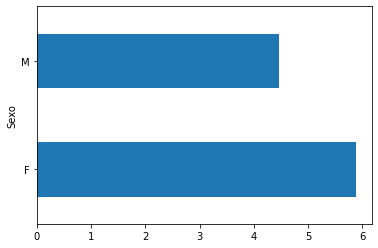

In [89]:
#Gráficos do Pandas
notas['MF'].groupby(notas['Sexo']).mean().plot(kind = 'barh')


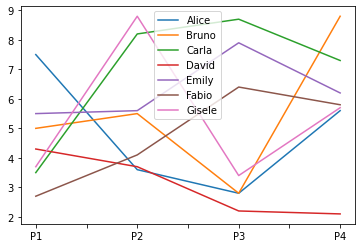

In [95]:
notas[colunas].T.plot();

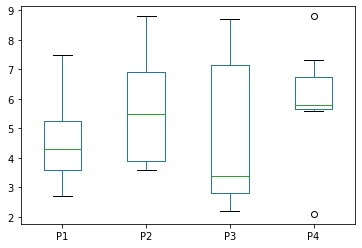

In [97]:
notas[colunas].plot( kind = 'box');

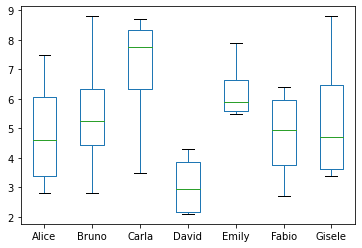

In [98]:
notas[colunas].T.plot( kind = 'box');

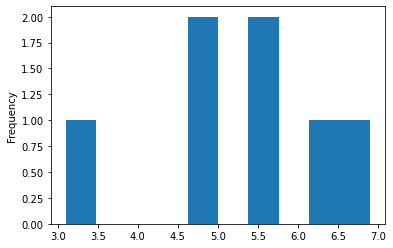

In [101]:
notas['MF'].plot( kind = 'hist');

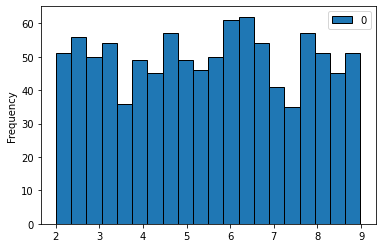

In [102]:
x = np.random.uniform(2,9,1000)
pd.DataFrame(x).plot(kind = 'hist', edgecolor = 'black', bins = 20)

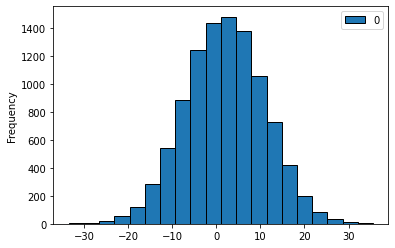

In [104]:
x = np.random.normal(2,9,10000)
pd.DataFrame(x).plot(kind = 'hist', edgecolor = 'black', bins = 20)